# Darstellung von quadratischen Funktionen

Sollen quadratische Funktionen in einem Diagramm dargestellt werden, so muss für die $x$-Achse ein geeignetes Intervall festgelegt werden. Dazu gibt es verschieden Möglichkeiten:

- Durch die Aufgabenstellung kommt nur ein bestimmtes Intervall in Frage. Soll zum Beispiel die Querschnittsfläche
  von Rohrleitungen als Funktion des Durchmessers dargestellt werden, so ist
  
  $$ 
    0 \le x \le d_\text{max}
  $$
  
  sinnvoll, wobei $d_\text{max}$ der maximale Durchmesser ist, der in diesem Diagramm auftritt.
- Durch die Aufgabenstellung wird kein konkretes Intervall vorgegeben. Dann versucht man, die interessanten
  Eigenschaften der Funktion in dem Diagramm zu zeigen. Das können z.B.
  - Die Schnittpunkte mit der $x$-Achse und der Schnittpunkt mit der $y$-Achse,
  - der Scheitelpunkt
  
  sein.

Ist ein quadratischer Ausdruck `y` in einer Variablen `v` gegeben, so können diese Größen mit `sympy` leicht ermittelt werden. Dazu muss die Variable nicht `x` heißen, sondern kann einen beliebigen Namen haben:

## Beispiel

Berechnen Sie den Scheitelpunkt und die Schnittpunkte mit der $x$-Achse des quadratischen Ausdrucks

`expr = 3*z**2 - 5*z + 9`

wobei `z` die Variable ist.

In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

from fun_expr import Function_from_Expression as FE

In [2]:
z = Symbol('z')

expr = 3*z**2 - 5*z + 9
expr

In diesem Fall sind die Koeffizienten $a=3$, $b=-5$ und $c=9$ bekannt und können leicht in die Formel

`x_s = -b/(2*a)` 

eingegeben werden. Häufig sind diese aber durch eine Berechnung ermittelt worden. Deshalb muss man die Koeffizienten dem Ausdruck `expr` entnehmen können. Das geht mit der Methode `expr.coeff()`. Diese Methode ermöglicht es, beliebige Koeffizienten einer beliebigen Variablen zu ermittlen:

In [3]:
a = expr.coeff(z,2)
b = expr.coeff(z,1)
c = expr.coeff(z,0)

(a,b,c)

Deshalb lässt sich der Scheitelpunkt einfach mittels der Formel

`z_s = -expr.coeff(z,1)/(2*expr.coeff(z,2))`

berechnen:

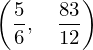

In [4]:
z_s = -expr.coeff(z,1)/(2*expr.coeff(z,2))
y_s = expr.subs(z,z_s)

(z_s,y_s)

Die Schnittpunkte mit der $x$-Achse ermittelt man durch Lösen der quadratischen Gleichung

\begin{align}
  \text{expr} &= 0\\
  3\,z^2 -5\,z + 9 &= 0
\end{align}

In [5]:
eq = Eq(expr,0)
eq

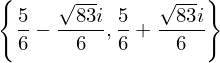

In [6]:
lsg = solveset(eq)
lsg

In diesem Fall existieren keine Schnittpunkte mit der $z$-Achse. Das erkennt man daran, dass die Lösung *komplexe* Zahlen enthält, die durch den Faktor $i$ gekennzeichnet sind. Sollen solche *komplexen* Lösungen nicht angezeigt werden. so schreibt man

In [7]:
lsg = solveset(eq,domain=S.Reals)
lsg

Die Lösung wird als Menge von Elementen zurückgegeben. Wenn es keine Lösungen gibt, so enthält diese Menge keine Elemente. Man spricht von einer leeren Menge, in Zeichen: $\emptyset$. Diese Parabel schneidet die $z$-Achse nicht.

Um den Ausdruck in einem Diagramm darzustellen, wird `matplotlib` mit `numpy` benutzt:

In [8]:
d = 3
lz = np.linspace(float(z_s)-d,float(z_s)+d)
f = lambdify(z,expr)

df = pd.DataFrame(
    {
        'z': lz,
        'expr': f(lz)
    }
)

df.head()

,z,expr
0,-2.166667,33.916667
1,-2.044218,31.757566
2,-1.921769,29.688428
3,-1.799320,27.709253
4,-1.676871,25.820040


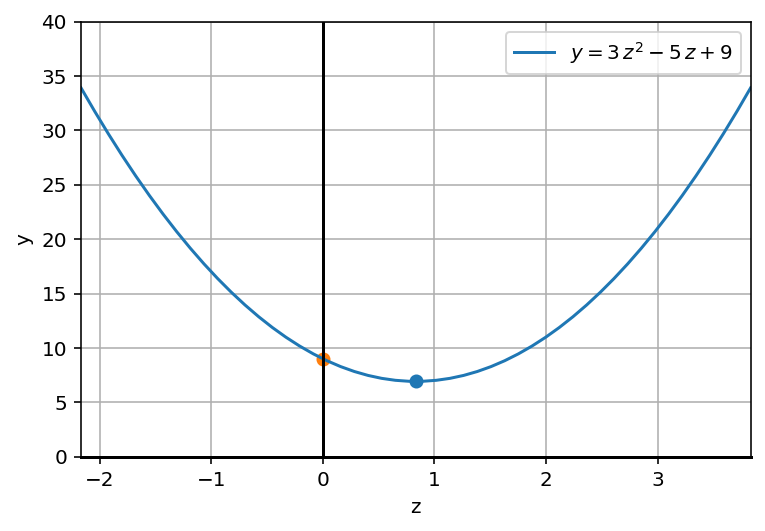

In [9]:
ax = df.plot(x='z',y='expr',label=f'$y=3\,z^2 - 5\,z + 9$',grid=True)
ax.scatter(z_s,f(z_s))
ax.scatter(0,f(0))

ax.set(ylim=(0,40),ylabel='y')
ax.axhline(0,c='k',clip_on=False)
ax.axvline(0,c='k')

## Aufgabe

Stellen Sie die Funktion $f(x) = -5\,x^2 +3\,x + 26$ in einem Diagramm dar. Bestimmen Sie dazu mit `sympy` den Scheitelpunkt und zeichnen Sie diesen in das Diagramm ein.

Wählen Sie das Intervall für die $x$-Achse so, dass der Scheitelpunkt gut erkennbar ist.

In [10]:
x = Symbol('x')

y = 5*x**2 + 3*x + 26
y

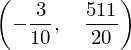

In [11]:
a = y.coeff(x,2)
b = y.coeff(x,1)
c = y.coeff(x,0)

x_s = -b/(2*a)
y_s = y.subs(x,x_s)

(x_s,y_s)

In [13]:
lx = np.linspace(-3,3)
f = lambdify(x,y)

df = pd.DataFrame(
    {
        'x': lx,
        'y': f(lx)
    }
)

df.head()

,x,y
0,-3.000000,62.000000
1,-2.877551,58.768846
2,-2.755102,55.687630
3,-2.632653,52.756352
4,-2.510204,49.975010


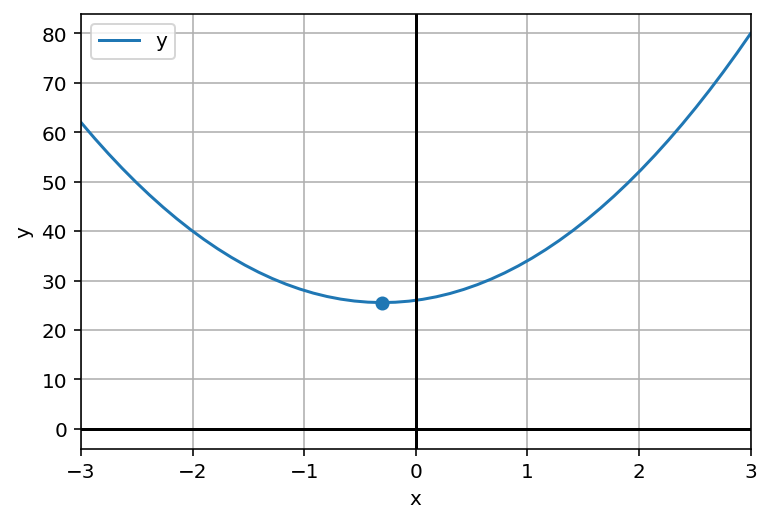

In [14]:
ax = df.plot(x='x',grid=True)

ax.scatter(x_s,y_s)
ax.set(xlabel='x',ylabel='y')

ax.axhline(0,c='k')
ax.axvline(0,c='k')

## Aufgabe

Die Funktion $f$ hängt nicht nur von $x$ ab, sondern von einem zusätzlichen Parameter $a$. Dabei ist $a$ ein Wert, der beliebig gewählt werden kann, aber sich nicht verändert. Man kennzeichnet dies oft durch die Schreibweise $f(x;a)$, wobei $x$ die Variable und $a$ der Parameter ist. 

$$
  f(x;a) = -5\,x^3 + a\,x + 15
$$

Geben Sie die Graphen $y=f(x;a)$ für $a\in\{-2,-1,0,1,2\}$ an. Die Variable $x$ soll im Intervall $-2\le x\le 2$ variieren.

In [15]:
x = Symbol('x')
a = Symbol('a')

y = -5*x**2 + a*x + 15
f = lambdify((x,a),y)

lx = np.linspace(-2,2)


df = pd.DataFrame(
    {
        'x': lx,
        'a=-2': f(lx,-2),
        'a=-1': f(lx,-1),
        'a=0': f(lx,0),
        'a=1': f(lx,1),
        'a=2': f(lx,2)
    }
)
df.head()

,x,a=-2,a=-1,a=0,a=1,a=2
0,-2.000000,-1.000000,-3.000000,-5.000000,-7.000000,-9.000000
1,-1.918367,0.436068,-1.482299,-3.400666,-5.319034,-7.237401
2,-1.836735,1.805498,-0.031237,-1.867972,-3.704706,-5.541441
3,-1.755102,3.108288,1.353186,-0.401916,-2.157018,-3.912120
4,-1.673469,4.344440,2.670970,0.997501,-0.675968,-2.349438


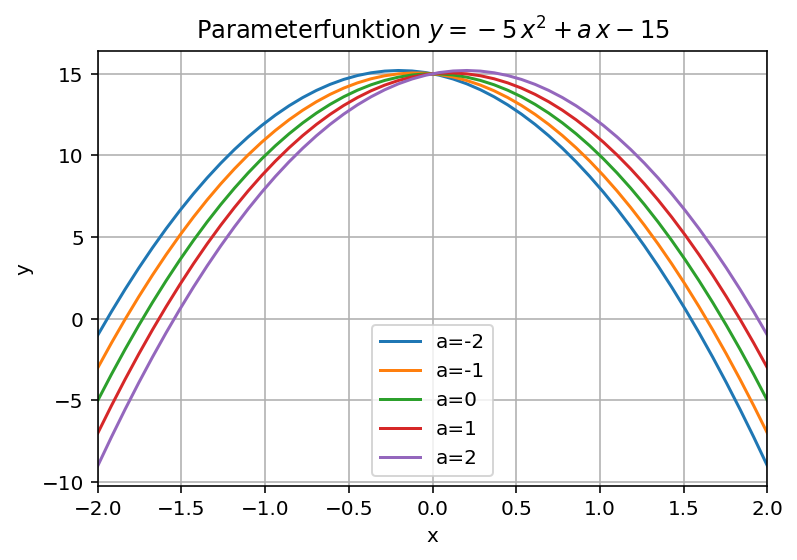

In [16]:
ax = df.plot(x='x',grid=True)

ax.set(
    ylabel='y',
    title='Parameterfunktion $y = -5\,x^2 + a\,x -15$'
)

plt.show()

## Aufgabe

Im folgenden hängt die Funktion $f$ nicht nur von der Variablen $x$ ab, sondern zusätzlich von einem *Parameter* b. Dieser wird für den Verlauf der Funktion als nicht veränderlich angesehen. Dies wird oft durch die Trennung der Variablen durch ein Semikolon angezeigt, man schreibt $f(x;b)$

Bestimmen Sie mittels `sympy` den Scheitelpunkt der quadratischen Funktion

$$
  f(x;b) = 15\,x^2 - 3\cdot b\cdot x + 5\,b^2-10
$$

Dabei soll $b$ eine beliebige aber fest gewählte Zahl sein. Überprüfen Sie Ihr Ergebnis für die Zahlen $b \in \{2,8,12\}$

In [17]:
x = Symbol('x')
b = Symbol('b')

y = 15*x**2 - 3*b*x + 5*b**2 -10
y

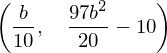

In [18]:
x_s = -y.coeff(x,1)/(2*y.coeff(x,2))
y_s = y.subs(x,x_s)

(x_s,y_s)

Um das Ergebnis zu überprüfen, können drei Graphen gezeichnet werden, in denen $b$ durch die entsprechende Werte ersezt wird:

Zunächst wird der Ausdruck `y` in eine Funktion `f(x;b)` überführt. Dazu wird `FE()` benutzt:

In [19]:
f = FE((x,b), y, name='f')
f.equation()

<IPython.core.display.Math object>

Der Graph $y=f(x)$ soll in einem vorgegebenen Intervall dargestellt werden. Da die Scheitelpunkte `x_s = b/10` für $b \in \{2,8,12\} überprüft werden sollen, muss das Intervall groß genug ausfallen:

In [20]:
lx = np.linspace(-5,5)

df = pd.DataFrame(
    {
        'lx': lx,
        'b=2': f.lambdified(lx,2),
        'b=8': f.lambdified(lx,8),
        'b=18': f.lambdified(lx,18),
    }
)

df.head()

,lx,b=2,b=8,b=18
0,-5.000000,415.000000,805.000000,2255.000000
1,-4.795918,383.788005,770.114536,2213.992087
2,-4.591837,353.825489,736.478551,2174.233653
3,-4.387755,325.112453,704.092045,2135.724698
4,-4.183673,297.648896,672.955019,2098.465223


In [21]:
# Berechnung der Scheitelwerte:
b_werte = [2,8,18]
x_werte = [v/10 for v in b_werte]
y_werte = [f(v/10,v) for v in (2,8,18)]

display(x_werte)
display(y_werte)

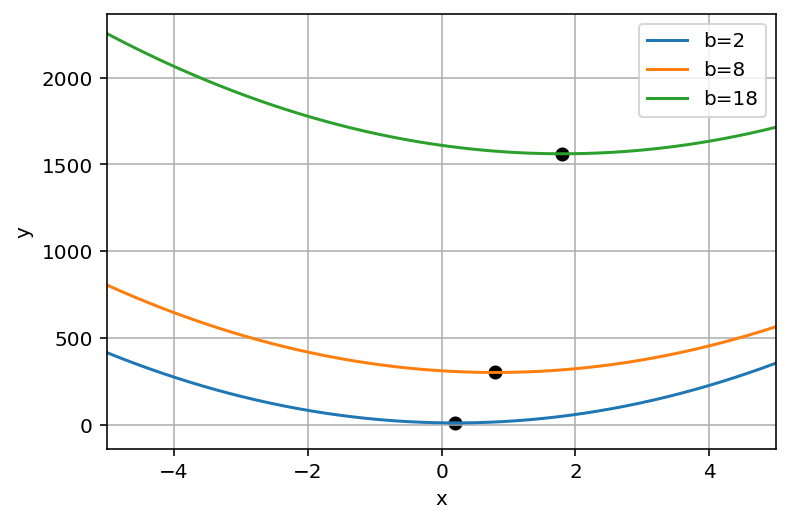

In [22]:
ax = df.plot(x='lx',grid=True)
ax.scatter(x_werte,y_werte,c='k')

ax.set(xlabel='x',ylabel='y')
plt.show()